<a href="https://colab.research.google.com/github/bbchen33/Machine-Learning/blob/master/Online_ML_with_Scikit-Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Online (incremental) machine learning using scikit-learn.

Use of pandas chuncksize method to stream data. Although the dataset is not particularly large (17000), this is a good practice for the actual incremental learning where the data would be streaming.

In [0]:
import pandas as pd
import numpy as np
df_chunk = pd.read_csv('sample_data/california_housing_train.csv', chunksize=1000)

In [0]:
for chunk in df_chunk:
  X_train = chunk[['housing_median_age', 'total_rooms']].values
  X_train_std = scaler.fit_transform(X_train)

In [70]:
X_train_std[:3, :]

array([[ 0.54128341, -0.8250528 ],
       [-0.04899294, -0.70632579],
       [-1.15576109, -1.01838968]])

In [0]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error as mae
clf = SGDRegressor(random_state = 1, alpha = 0.001)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mae_list = []
y_pred_list = []
y_train_list = []
for chunk in df_chunk:
  X_train = chunk[['housing_median_age', 'total_rooms']].values
  X_train_std = scaler.fit_transform(X_train)
  y_train = chunk['median_house_value'].values

  y_train_list.append(y_train)
  clf.partial_fit(X_train_std, y_train)
  y_pred = clf.predict(X_train_std)
  mae_list.append(mae(y_train, y_pred))
  y_pred_list.append(y_pred)

In [4]:
mae_list

[51981.106145971295,
 76907.2411682105,
 77488.17246008036,
 67776.23373105931,
 63495.241795410904,
 63131.97055089009,
 66831.43337697982,
 97951.9551056897,
 103772.04421370354,
 103015.28252640694,
 63638.60189470313,
 40911.77283942216,
 62569.3825702628,
 81114.83417965719,
 107152.26177761033,
 100478.65680056355,
 91572.01663373434]

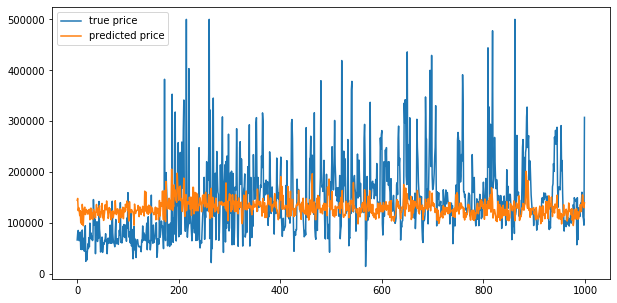

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_train_list[0], label = 'true price')
plt.plot(y_pred_list[0], label = 'predicted price')
plt.legend()


The first 1000 sample prediction was just okay. The mae was a little worse than the result predicted by CREME (70000) but this is without any model tuning. (https://github.com/bbchen33/Machine-Learning/blob/master/Online_ML_with_CREME.ipynb)